Data dictionary
The following are the column descriptions. Columns 0 to 5 and 11 to 13 are common to both files. The rest are present to the extended file only.

Gender: gender of the student (male/female)
EthnicGroup: ethnic group of the student (group A to E)
ParentEduc: parent(s) education background
LunchType: school luch type (standard or free/reduced)
TestPrep: test preparation course (completed or none)
ParentMaritalStatus: parent(s) marital status
PracticeSport: how often the student parctice sport
IsFirstChild: if the child is first child in the family or not
NrSiblings : Number of siblings the student has
TransportMeans: Means of transport to school
WklyStudyHours: Weekly self-study hours
MathScore: math test score
ReadingScore: reading test score
WritingScore writing test score

IMPORTING LIBS



In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

IMPORTING DATA

In [3]:
data_org=pd.read_csv('Original_data_with_more_rows.csv')
data_extended= pd.read_csv('Expanded_data_with_more_features.csv')



HEAD

In [4]:
data_org.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


DROPPING UNUSED COLUMNS

In [6]:
data_org = data_org.drop('Unnamed: 0', axis=1)
data_org.head(3)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


DATA INFO

In [7]:
data_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        30641 non-null  object
 1   EthnicGroup   30641 non-null  object
 2   ParentEduc    30641 non-null  object
 3   LunchType     30641 non-null  object
 4   TestPrep      30641 non-null  object
 5   MathScore     30641 non-null  int64 
 6   ReadingScore  30641 non-null  int64 
 7   WritingScore  30641 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.9+ MB


IF ANY DUBLICATES

In [10]:
data_org.duplicated().sum()

0

PLOTTING FIGURES

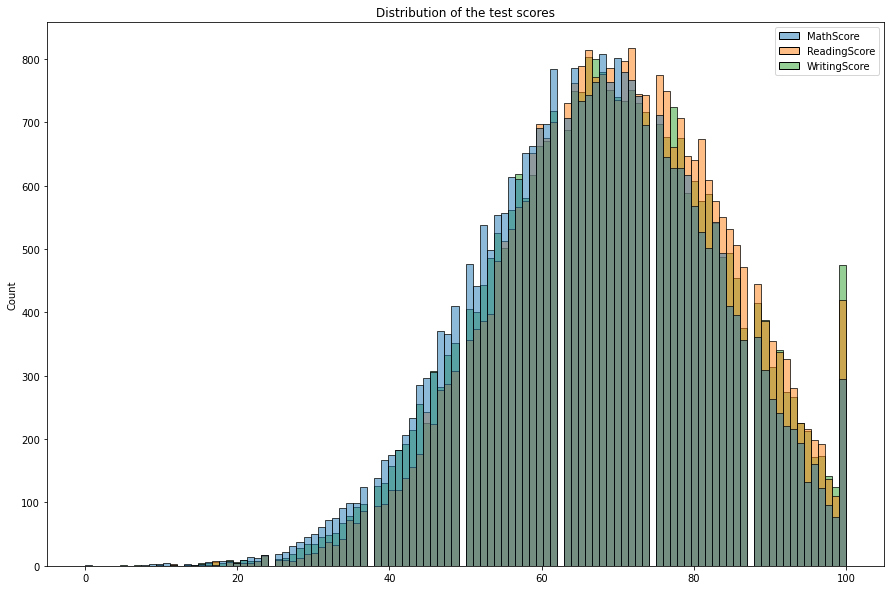

In [13]:
plt.figure(figsize=(15,10))
sns.histplot(data_org[['MathScore', 'ReadingScore', 'WritingScore']])
plt.title('Distribution of the test scores');

GROUP BY GENDER

In [16]:
data_org.groupby(['Gender'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)

,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.262902,73.093815,72.897692
male,69.269633,66.108957,63.978708


EXTENTED VERSION

In [17]:
data_extended = data_extended.drop('Unnamed: 0', axis=1)
data_extended.head(3)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91


In [18]:
data_extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [19]:
data_extended.duplicated().sum()

0

In [21]:
data_extended.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [22]:
data_extended.shape

(30641, 14)

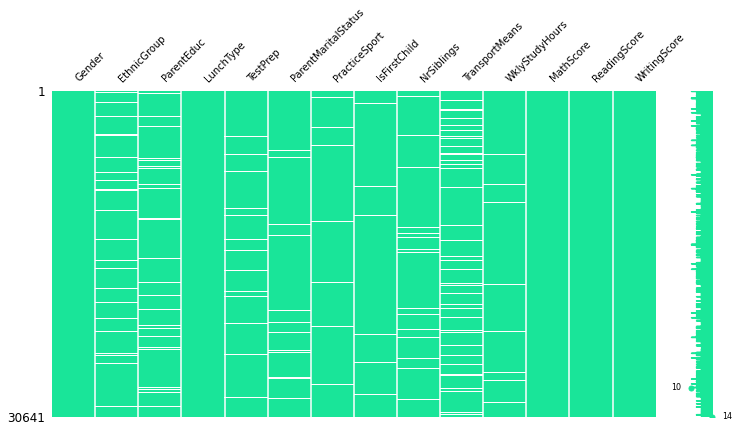

In [20]:
msno.matrix(data_extended,
           figsize=(12, 6),
           color=(0.1, 0.9, 0.6),
           fontsize=10);

In [23]:
for col in data_extended.columns:
    print('Missing values in column {} is {} %'.format(col, np.round(data_extended[col].isnull().sum()*100/(len(data_extended[col])), 1)))

Missing values in column Gender is 0.0 %
Missing values in column EthnicGroup is 6.0 %
Missing values in column ParentEduc is 6.0 %
Missing values in column LunchType is 0.0 %
Missing values in column TestPrep is 6.0 %
Missing values in column ParentMaritalStatus is 3.9 %
Missing values in column PracticeSport is 2.1 %
Missing values in column IsFirstChild is 3.0 %
Missing values in column NrSiblings is 5.1 %
Missing values in column TransportMeans is 10.2 %
Missing values in column WklyStudyHours is 3.1 %
Missing values in column MathScore is 0.0 %
Missing values in column ReadingScore is 0.0 %
Missing values in column WritingScore is 0.0 %


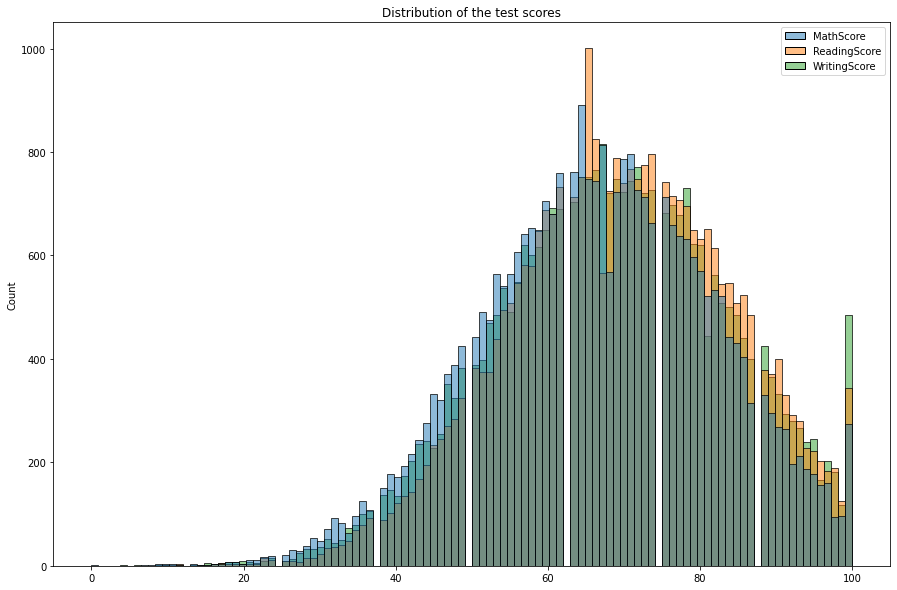

In [25]:
plt.figure(figsize=(15,10))
sns.histplot(data_extended[['MathScore', 'ReadingScore', 'WritingScore']])
plt.title('Distribution of the test scores');

In [26]:
data_extended[['MathScore', 'ReadingScore', 'WritingScore']].agg([np.mean, np.std, np.max, np.min])

,MathScore,ReadingScore,WritingScore
mean,66.558402,69.377533,68.418622
std,15.361616,14.758952,15.443525
amax,100.000000,100.000000,100.000000
amin,0.000000,10.000000,4.000000


INSIGHTS

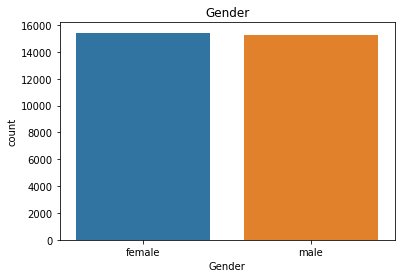

In [27]:
sns.countplot(x=data_extended['Gender'])
plt.title('Gender');

In [28]:
data_extended.groupby(['Gender'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)


,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.080654,72.853216,72.856457
male,69.069856,65.854571,63.920418


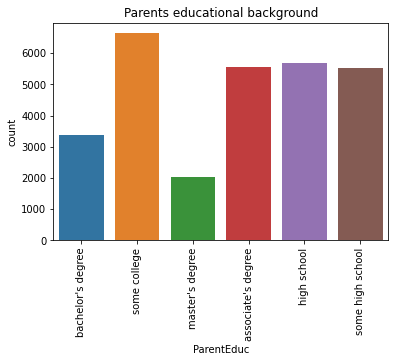

In [30]:
sns.countplot(x=data_extended['ParentEduc'])
plt.title('Parents educational background')
plt.xticks(rotation=90);

In [31]:
data_extended.groupby(['ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)


,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


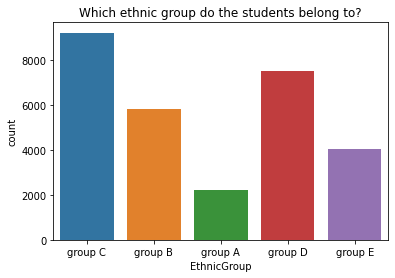

In [32]:
sns.countplot(x=data_extended['EthnicGroup'])
plt.title('Which ethnic group do the students belong to?');

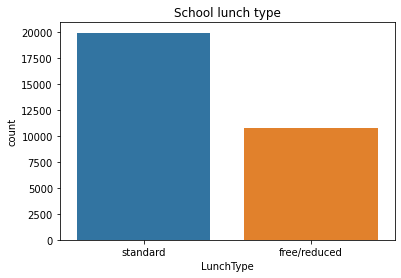

In [33]:
sns.countplot(x=data_extended['LunchType'])
plt.title('School lunch type');

In [34]:
data_extended.groupby(['LunchType'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)


,MathScore,ReadingScore,WritingScore
LunchType,,,
free/reduced,58.862332,64.189735,62.650522
standard,70.709370,72.175634,71.529716


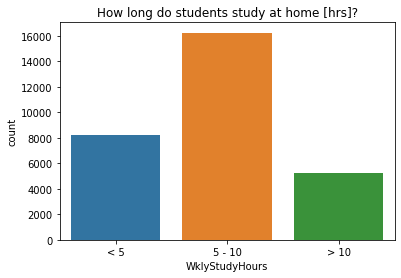

In [35]:
sns.countplot(x=data_extended['WklyStudyHours'])
plt.title('How long do students study at home [hrs]?');

In [36]:
data_extended.groupby(['WklyStudyHours'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)


,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
5 - 10,66.870491,69.660532,68.636280
< 5,64.580359,68.176135,67.090192
> 10,68.696655,70.365436,69.777778


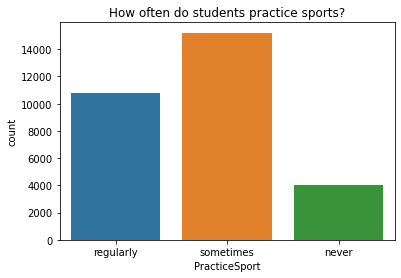

In [37]:
sns.countplot(x=data_extended['PracticeSport'])
plt.title('How often do students practice sports?');

In [38]:
data_extended.groupby(['PracticeSport'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)


,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.171079,68.337662,66.522727
regularly,67.839155,69.943019,69.604003
sometimes,66.274831,69.241307,68.072438


In [39]:
data_extended.groupby(['Gender', 'ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)


MathScore  ReadingScore  WritingScore
Gender ParentEduc                                               
female associate's degree  65.994933     74.759682     74.913500
       bachelor's degree   67.498233     75.981154     77.217314
       high school         62.194580     70.958652     70.155664
       master's degree     70.181195     79.376102     80.804114
       some college        63.541679     72.336966     72.520766
       some high school    60.291153     69.144307     68.289340
male   associate's degree  70.715823     67.520273     65.724435
       bachelor's degree   73.452607     70.125592     69.421801
       high school         66.731933     63.377358     60.570310
       master's degree     74.531936     72.222555     71.825349
       some college        69.377393     65.869364     64.287214
       some high school    64.876042     61.878579     58.977166

In [40]:
data_extended.groupby(['TestPrep'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)


,MathScore,ReadingScore,WritingScore
TestPrep,,,
completed,69.54666,73.732998,74.703265
none,64.94877,67.051071,65.092756


In [41]:
data_extended.groupby(['WklyStudyHours', 'ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)


MathScore  ReadingScore  WritingScore
WklyStudyHours ParentEduc                                               
5 - 10         associate's degree  68.510588     71.231261     70.335798
               bachelor's degree   70.667598     73.308939     73.483240
               high school         64.713592     67.391909     65.583172
               master's degree     72.792527     76.527040     76.881023
               some college        66.937322     69.635328     68.936752
               some high school    62.942637     65.818468     63.884225
< 5            associate's degree  66.333790     69.911583     68.939685
               bachelor's degree   68.432755     71.955531     72.104121
               high school         62.707235     66.014199     64.086545
               master's degree     70.309524     74.335034     74.760204
               some college        64.306167     68.012665     67.211454
               some high school    60.633822     64.457390     62.374834
> 10           associate's degree  71.043386     72.908995     72.539683
               bachelor's degree   73.057451     74.438061     75.235189
               high school         66.359743     68.529979     66.889722
               master's degree     74.187845     76.212707     77.281768
               some college        68.195341     69.620072     69.209677
               some high school    64.638493     66.076375     64.600815

In [42]:
data_extended.groupby(['Gender', 'PracticeSport'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)


MathScore  ReadingScore  WritingScore
Gender PracticeSport                                       
female never          61.979208     71.805941     70.983663
       regularly      65.297035     73.428624     73.994510
       sometimes      63.754529     72.704384     72.530717
male   never          66.402722     64.806452     61.980847
       regularly      70.445675     66.369112     65.102271
       sometimes      68.802765     65.767742     63.600658

END